

<center>

#<b>CS353 ML Lab 4</b>

## Name: K V Sumanth Reddy
## Roll No: 181CO225
---

###Q: Write a program in python to implement and demonstrate linear regression for a sample training data set. Compute the accuracy of the classifier.
---
#####Dataset Used: Marketing Data (https://www.kaggle.com/fayejavad/marketing-linear-multiple-regression)
</center>

##Importing Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

In [2]:
dataset = pd.read_csv('Marketing_Data.csv')
dataset.head(10)

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88
5,114.84,1.68,8.88,11.40
6,348.84,4.92,10.20,15.36
7,320.28,52.56,6.00,30.48
8,89.64,59.28,54.84,17.64
9,51.72,32.04,42.12,12.12


In [3]:
dataset.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


##Data Preprocessing

In [5]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:, -1].values

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 4)

##Training the model and Testing

In [7]:
model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print("-----------------------------")
print("Model coefficients:", model.coef_)
print("Model intercept:     %.4f"% model.intercept_)
print("Variance score:      %.4f" % model.score(x_test, y_test))
print("-----------------------------")


-----------------------------
Model coefficients: [0.04637277 0.17605644 0.00666605]
Model intercept:     3.5047
Variance score:      0.9142
-----------------------------


# Regression Evaluation Metrics





**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [8]:
print("-------------------------------")
print('Mean Absolute Error: %.3f'% metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: %.3f'% metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: %.3f'% np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("-------------------------------")

-------------------------------
Mean Absolute Error: 1.254
Mean Squared Error: 2.846
Root Mean Squared Error: 1.687
-------------------------------


#Predictions and Visualization

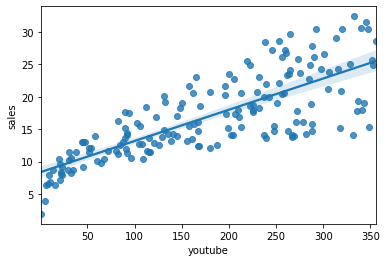

In [9]:
sns.regplot(x="youtube", y="sales", data=dataset)

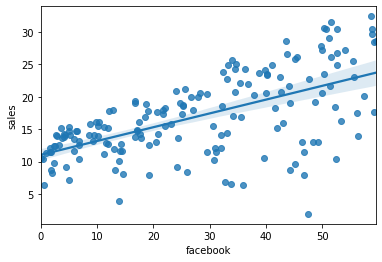

In [10]:
sns.regplot(x="facebook", y="sales", data=dataset)

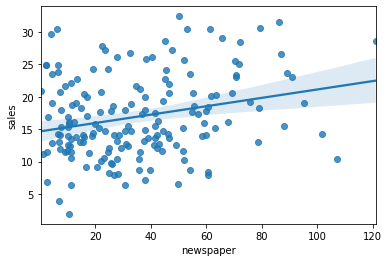

In [11]:
sns.regplot(x="newspaper", y="sales", data=dataset)

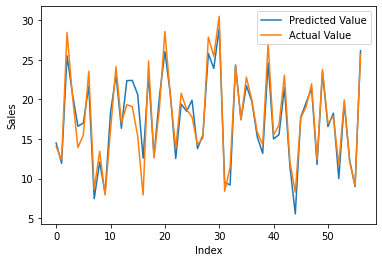

In [12]:
plt.plot([i for i in range(y_pred.size)],y_pred)
plt.xlabel('Index')
plt.ylabel('Sales')
plt.plot([i for i in range(y_test.size)],y_test)
plt.legend(['Predicted Value', 'Actual Value'])
plt.show()